In [0]:
# changed on 2020-02-19
# project repo - https://github.com/udacity/CVND---Image-Captioning-Project
# project folder - https://drive.google.com/open?id=1dsI_4ryt1-EruzDZC4pQkZh8rFFAfSf2
# coco dataset folder - https://drive.google.com/open?id=16MuMuFArz4mOeV0tTP6Z89iLu5sgcg2-
# cocoapi - https://github.com/cocodataset/cocoapi
# downlaod coco datasets - http://cocodataset.org/#download

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
import platform
platform.system()

'Windows'

# Installation

## Install COCO API

In [ ]:
### for Windows 10 only
!pip install cython
'''
Collecting cython
  Downloading Cython-0.29.15-cp36-cp36m-win_amd64.whl (1.7 MB)
Installing collected packages: cython
Successfully installed cython-0.29.15
'''
### https://github.com/philferriere/cocoapi
!pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI
### Successfully installed pycocotools-2.0

In [0]:
# !pip install pycocotools
### Requirement already satisfied: pycocotools in /usr/local/lib/python3.6/dist-packages (2.0.0)
'''
To install:
- For Matlab, add coco/MatlabApi to the Matlab path (OSX/Linux binaries provided)
- For Python, run "make" under coco/PythonAPI
- For Lua, run “luarocks make LuaAPI/rocks/coco-scm-1.rockspec” under coco/
'''
### download cocoapi
# %cd /content/drive/My Drive/data/
# !git clone https://github.com/cocodataset/cocoapi.git
### install cocoapi
%cd /content/drive/My Drive/data/cocoapi/PythonAPI/
!make

/content/drive/My Drive/data/coco/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.6/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
       ^~~
../common/maskApi.c:46:49: note: ...this statement, but the latter is misleadingly inden

## Download and Unzip COCO Dataset

In [0]:
%%capture
# In addition to this API, please download both the COCO images and annotations in order to run the demos and use the API. 
# Both are available on the project website.
# - Please download, unzip, and place the images in: coco/images/
# - Please download and place the annotations in: coco/annotations/
# For substantially more details on the API please see http://cocodataset.org/#download.
'''
Images
2014 Train images [83K/13GB]
2014 Val images [41K/6GB]
2014 Test images [41K/6GB]
Annotations
2014 Train/Val annotations [241MB]
2014 Testing Image info [1MB]
'''
%cd /content/drive/My Drive/data/cocoapi
# !wget http://images.cocodataset.org/zips/train2014.zip
# !wget http://images.cocodataset.org/zips/val2014.zip
# !wget http://images.cocodataset.org/zips/test2014.zip
# !wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
# !wget http://images.cocodataset.org/annotations/image_info_test2014.zip
# !unzip image_info_test2014.zip
# !unzip annotations_trainval2014.zip
# !unzip test2014.zip -d ./images
# !unzip val2014.zip -d ./images
### train2014.zip is too large to unzip in Google Drive.

In [0]:
%cd /content/drive/My Drive/data/cocoapi/images/test2014
!ls -1 | wc -l
%cd /content/drive/My Drive/data/cocoapi/images/val2014
!ls -1 | wc -l
!ls -l -t | head -3
%cd /content/drive/My Drive/data/cocoapi/images/train2014
!ls -1 | wc -l
### 40775, 12448, 82783

/content/drive/My Drive/data/coco/images/test2014
40775
/content/drive/My Drive/data/coco/images/val2014
12448
total 2003183
-rw------- 1 root root 131072 Feb 20 07:31 COCO_val2014_000000064196.jpg
-rw------- 1 root root  97852 Aug 16  2014 COCO_val2014_000000406665.jpg
/content/drive/My Drive/data/coco/images/train2014
ls: cannot open directory '.': Input/output error
0


# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, ansd captioning algorithms.  

![Sample Dog Output](https://drive.google.com/uc?id=111Frk9NQce9ZQu170lFs-9-4HwT1hche)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [9]:
# %cd '/content/drive/My Drive/data/coco'
import os
import sys
# sys.path.append('/opt/cocoapi/PythonAPI') # Ubuntu
# sys.path.append('/content/drive/My Drive/data/cocoapi/PythonAPI') # Google Colab
sys.path.append('D:\data\cocoapi\PythonAPI') # Windows
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
# dataDir = '/opt/cocoapi'
# dataDir = '/content/drive/My Drive/data/cocoapi'
dataDir = 'D:\data\cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=6.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.43s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

In [ ]:
# !pip install scikit-image 
### Successfully installed PyWavelets-1.1.1 imageio-2.8.0 networkx-2.4 scikit-image-0.16.2

http://images.cocodataset.org/val2014/COCO_val2014_000000330495.jpg


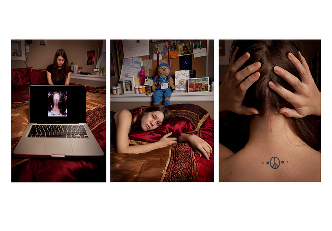

A beautiful woman laying around a -bed with a neck tattoo.
Set of three images showing a woman in her bedroom recovering from surgery. 
A girl on a bed who also has a large scar down the middle of her head.
A woman is sitting then laying down then showing a scar on her neck.
A series of photographs of a teenage girl in her bedroom


In [14]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](https://drive.google.com/uc?id=10wksXdl-QfigoNtpvUfpg-iK5dDk6Tv9)